In [1]:
'''
references:

https://www.analyticsvidhya.com/blog/2020/10/how-to-create-an-arima-model-for-time-series-forecasting-in-python/

'''

#python data analysis imports
import pandas as pd
from pandas import Series, DataFrame
import numpy as np

#visualization imports
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

#grab data imports
import pandas_datareader.data as pdr
from datetime import datetime

In [2]:
#We are going to analyze the top cryptocurrencies.
cc_list = ['BTC-USD','ETH-USD','LTC-USD']

In [3]:
#Setting the end date to today
end = datetime.today()

#Start date set to one year back
start = datetime(end.year-1,end.month,end.day)

In [4]:
#using yahoo finance to grab cryptocurrency data
BTC = pdr.DataReader('BTC-USD','yahoo',start,end)
ETH = pdr.DataReader('ETH-USD','yahoo',start,end)
LTC = pdr.DataReader('LTC-USD','yahoo',start,end)

In [5]:
#STATISTICS FOR BTC'S STOCK
BTC.describe()

,High,Low,Open,Close,Volume,Adj Close
count,363.000000,363.000000,363.000000,363.000000,3.630000e+02,363.000000
mean,15790.051138,14908.646635,15322.472039,15443.920686,3.744242e+10,15443.920686
std,11255.831768,10312.497680,10733.237887,10932.144553,1.835237e+10,10932.144553
min,5331.833984,4106.980957,5002.578125,4970.788086,1.225260e+10,4970.788086
25%,9298.017090,9089.074707,9186.400879,9188.335938,2.368586e+10,9188.335938
50%,10915.843750,10632.631836,10752.939453,10774.426758,3.399789e+10,10774.426758
75%,18338.789062,17470.835938,17810.472656,17937.997070,4.541911e+10,17937.997070
max,58330.570312,55721.371094,57305.164062,57471.191406,1.233206e+11,57471.191406


In [6]:
#INFORMATION ABOUT BTC DATAFRAME
BTC.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 363 entries, 2020-02-21 to 2021-02-21
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       363 non-null    float64
 1   Low        363 non-null    float64
 2   Open       363 non-null    float64
 3   Close      363 non-null    float64
 4   Volume     363 non-null    float64
 5   Adj Close  363 non-null    float64
dtypes: float64(6)
memory usage: 19.9 KB


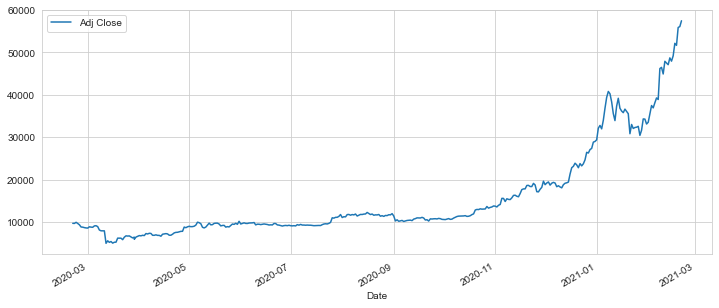

In [7]:
#Using pandas we canplot the stocks adjusted closing price
BTC['Adj Close'].plot(legend = True, figsize=(12,5))

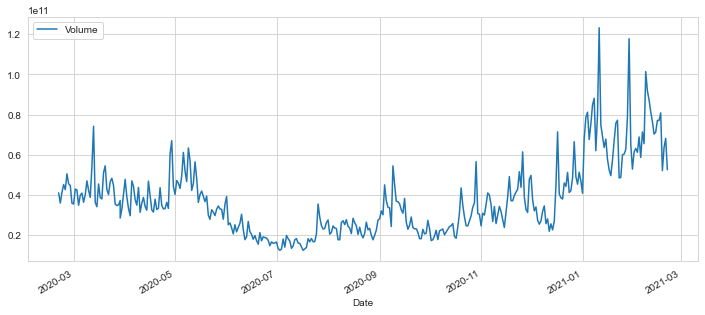

In [8]:
#Using pandas once more to plot the total volume being traded over time
BTC['Volume'].plot(legend=True,figsize=(12,5))

In [10]:
#using pandas we will create moving averages for 10, 20 and 50 day periods of time

ma_days = [10,20,50]

for ma in ma_days:
    column_name = "MA %s days" %(str(ma))
    BTC[column_name] = BTC['Adj Close'].rolling(window=ma,center=False).mean()

In [11]:
BTC.tail()

,High,Low,Open,Close,Volume,Adj Close,MA 10 days,MA 20 days,MA 50 days
Date,,,,,,,,,
2021-02-17,52533.914062,49072.378906,49207.277344,52149.007812,8.082055e+10,52149.007812,47812.667969,41979.316602,37430.467852
2021-02-18,52474.105469,51015.765625,52140.972656,51679.796875,5.205472e+10,51679.796875,48361.001172,42847.487109,37887.244727
2021-02-19,56113.652344,50937.277344,51675.980469,55888.132812,6.349550e+10,55888.132812,49301.703906,43928.417578,38424.972969
2021-02-20,57505.226562,54626.558594,55887.335938,56099.519531,6.814546e+10,56099.519531,50419.837500,45077.675586,38959.480313
2021-02-21,58330.570312,55721.371094,57305.164062,57471.191406,5.250492e+10,57471.191406,51376.023438,46274.376367,39466.358789


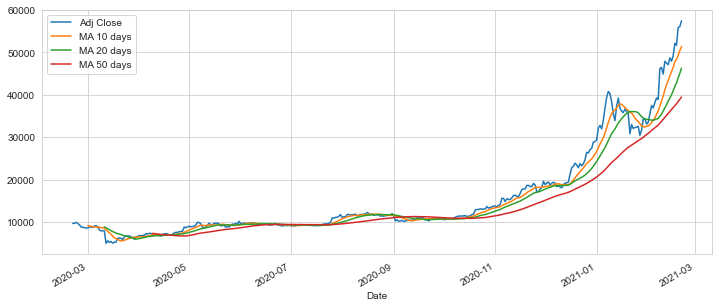

In [12]:
BTC[['Adj Close','MA 10 days','MA 20 days','MA 50 days']].plot(legend=True,figsize=(12,5))

In [13]:
#In order calculate daily return we can use the percentage change of the adjusted closing price

BTC['Daily Return'] = BTC['Adj Close'].pct_change()

BTC['Daily Return'].tail()

Date
2021-02-17    0.059942
2021-02-18   -0.008998
2021-02-19    0.081431
2021-02-20    0.003782
2021-02-21    0.024451
Name: Daily Return, dtype: float64

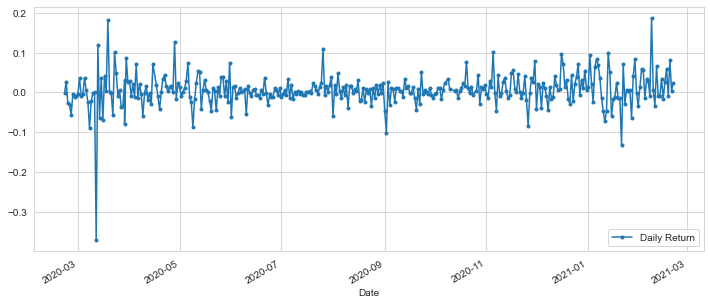

In [14]:
#Let us now plot the daily return
BTC['Daily Return'].plot(marker='.',legend=True,figsize=(12,5))

In [16]:
#Let's read the 'Adj Close' column from all the cryptocurrencies giants
close_df = pdr.DataReader(cc_list,'yahoo',start,end)['Adj Close']

In [22]:
from statsmodels.tsa.stattools import adfuller
test_result=adfuller(close_df['BTC-USD'])
test_result

(2.377907982743545,
 0.9989995309732287,
 12,
 350,
 {'1%': -3.4491725955218655,
  '5%': -2.8698334971428574,
  '10%': -2.5711883591836733},
 5624.35830473267)

In [26]:
def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )

    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary")
    else:
        print("weak evidence against null hypothesis,indicating it is non-stationary ")

adfuller_test(close_df['BTC-USD'])

ADF Test Statistic : 2.377907982743545
p-value : 0.9989995309732287
#Lags Used : 12
Number of Observations : 350
weak evidence against null hypothesis,indicating it is non-stationary 


In [27]:
close_df['Bitcoin First Difference'] = close_df['BTC-USD'] - close_df['BTC-USD'].shift(1)
close_df['Seasonal First Difference'] = close_df['BTC-USD'] - close_df['BTC-USD'].shift(12)
close_df.head()

Symbols,BTC-USD,ETH-USD,LTC-USD,Bitcoin First Difference,Seasonal First Difference
Date,,,,,
2020-02-21,9686.441406,265.600616,73.450920,NaN,NaN
2020-02-22,9663.181641,262.331726,75.133080,-23.259766,NaN
2020-02-23,9924.515625,273.754150,79.536652,261.333984,NaN
2020-02-24,9650.174805,265.216431,75.535622,-274.340820,NaN
2020-02-25,9341.705078,247.817596,71.180244,-308.469727,NaN


In [29]:
# Again testing if data is stationary
adfuller_test(close_df['Seasonal First Difference'].dropna())

ADF Test Statistic : -2.6009285778506923
p-value : 0.09280550111682351
#Lags Used : 12
Number of Observations : 338
weak evidence against null hypothesis,indicating it is non-stationary 


In [30]:
adfuller_test(close_df['Bitcoin First Difference'].dropna())

ADF Test Statistic : -3.8253204059377963
p-value : 0.0026586226187483297
#Lags Used : 17
Number of Observations : 344
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary


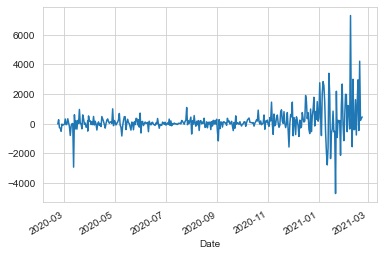

In [31]:
close_df['Bitcoin First Difference'].plot()

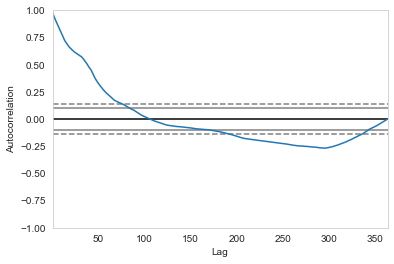

In [33]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(close_df['BTC-USD'])
plt.show()

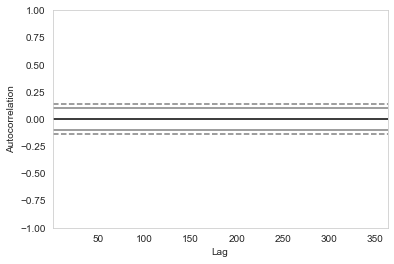

In [32]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(close_df['Bitcoin First Difference'])
plt.show()

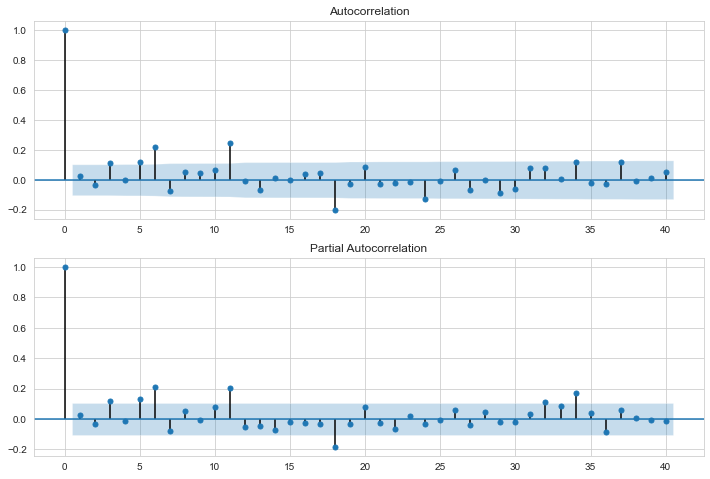

In [36]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(close_df['Bitcoin First Difference'].dropna(),lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(close_df['Bitcoin First Difference'].dropna(),lags=40,ax=ax2)

In [37]:
# For non-seasonal data
#p=1, d=1, q=0 or 1

from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(close_df['BTC-USD'],order=(1,1,1))
model_fit=model.fit()
model_fit.summary()

C:\Users\T430\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\T430\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:              D.BTC-USD   No. Observations:                  362
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2960.005
Method:                       css-mle   S.D. of innovations            860.798
Date:                Sun, 21 Feb 2021   AIC                           5928.011
Time:                        19:36:17   BIC                           5943.577
Sample:                             1   HQIC                          5934.199
                                                                              
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             129.6501     46.809      2.770      0.006      37.906     221.394
ar.L1.D.BTC-USD    -0.6046      0.254     -2.378      0.017      -1.103      -0.106
ma.L1.D.BTC-USD     0.6602      0.238      2.771      0.006       0.193       1.127
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.6540           +0.0000j            1.6540            0.5000
MA.1           -1.5146           +0.0000j            1.5146            0.5000
-----------------------------------------------------------------------------
"""

C:\Users\T430\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:580: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


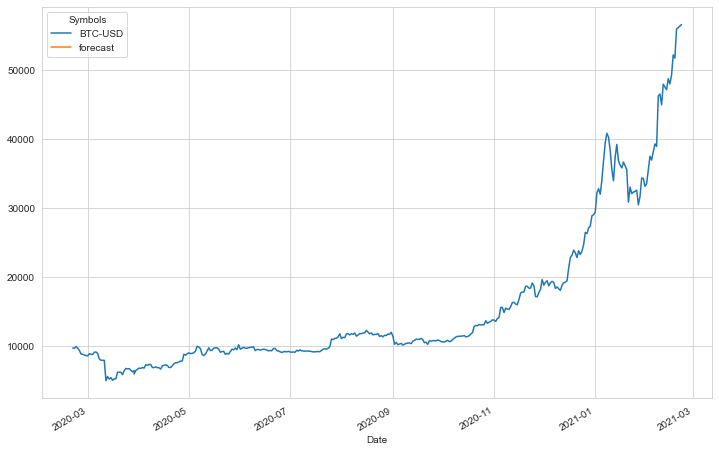

In [48]:
close_df['forecast']=model_fit.predict(start=360,end=365,dynamic=True)
close_df[['BTC-USD','forecast']].plot(figsize=(12,8))

In [43]:
len(close_df)

363

C:\Users\T430\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\T430\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


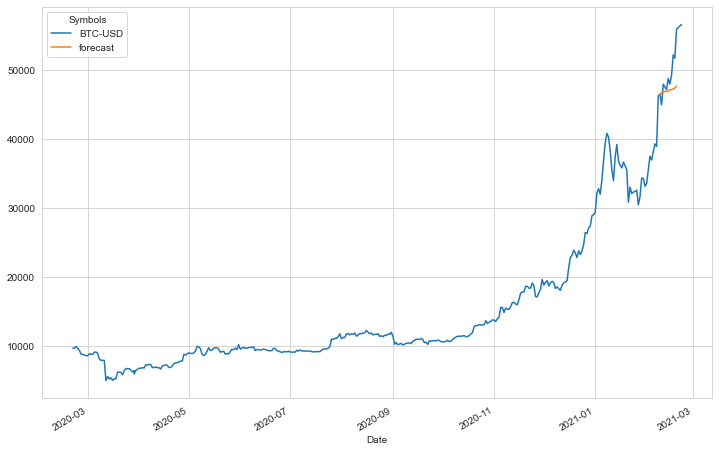

In [74]:
import statsmodels.api as sm
model=sm.tsa.statespace.SARIMAX(close_df['BTC-USD'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()
close_df['forecast']=results.predict(start=350,end=360,dynamic=True)
close_df[['BTC-USD','forecast']].plot(figsize=(12,8))

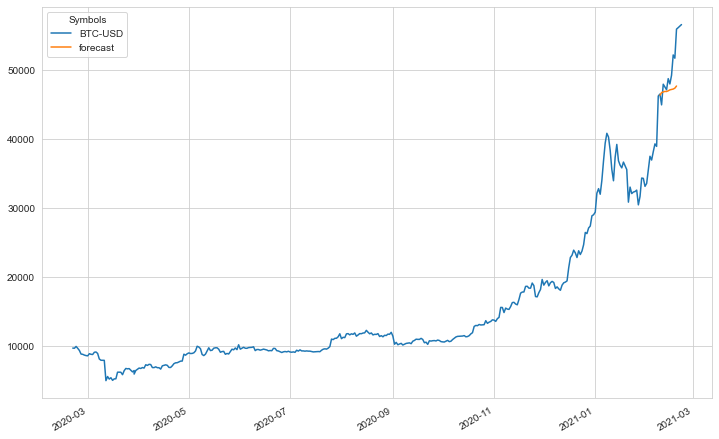

In [76]:
from pandas.tseries.offsets import DateOffset
future_dates=[close_df.index[-1]+ DateOffset(months=x)for x in range(0,24)]
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=close_df.columns)

future_datest_df.tail()

future_df=pd.concat([close_df,future_datest_df])

future_df['forecast'] = results.predict(start = 350, end = 360, dynamic= True)
future_df[['BTC-USD', 'forecast']].plot(figsize=(12, 8))

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df=pd.read_csv('time_series_data.csv')
df.head()

# Updating the header
df.columns=["Month","Sales"]
df.head()
df.describe()
df.set_index('Month',inplace=True)

from pylab import rcParams
rcParams['figure.figsize'] = 15, 7
df.plot()

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
test_result=adfuller(df['Sales'])

In [ ]:
def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )

if result[1] <= 0.05:
    print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary")
else:
    print("weak evidence against null hypothesis,indicating it is non-stationary ")

adfuller_test(df['Sales'])

In [ ]:
df['Sales First Difference'] = df['Sales'] - df['Sales'].shift(1)
df['Seasonal First Difference']=df['Sales']-df['Sales'].shift(12)
df.head()

In [ ]:
# Again testing if data is stationary
adfuller_test(df['Seasonal First Difference'].dropna())

In [ ]:
df['Seasonal First Difference'].plot()

In [ ]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Sales'])
plt.show()

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Seasonal First Difference'].dropna(),lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Seasonal First Difference'].dropna(),lags=40,ax=ax2)

In [ ]:
# For non-seasonal data
#p=1, d=1, q=0 or 1
from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(df['Sales'],order=(1,1,1))
model_fit=model.fit()
model_fit.summary()

In [ ]:
df['forecast']=model_fit.predict(start=90,end=103,dynamic=True)
df[['Sales','forecast']].plot(figsize=(12,8))

In [ ]:
import statsmodels.api as sm
model=sm.tsa.statespace.SARIMAX(df['Sales'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()
df['forecast']=results.predict(start=90,end=103,dynamic=True)
df[['Sales','forecast']].plot(figsize=(12,8))

In [ ]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,24)]
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

future_datest_df.tail()

future_df=pd.concat([df,future_datest_df])

future_df['forecast'] = results.predict(start = 104, end = 120, dynamic= True)
future_df[['Sales', 'forecast']].plot(figsize=(12, 8))

In [ ]:
https://www.analyticsvidhya.com/blog/2020/11/stock-market-price-trend-prediction-using-time-series-forecasting/

In [99]:
import os
import warnings
warnings.filterwarnings('ignore')
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
import numpy as np
from nsepy import get_history
from datetime import date
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [81]:
sbin = get_history(symbol='SBIN',
                   start=date(2000,1,1),
                   end=date(2020,11,1))
sbin.head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2000-01-03,SBIN,EQ,225.60,236.00,243.65,234.25,243.65,243.65,240.83,2373228,5.715338e+13,NaN,NaN,NaN
2000-01-04,SBIN,EQ,243.65,243.65,262.00,238.85,258.00,259.10,251.46,4495741,1.130506e+14,NaN,NaN,NaN
2000-01-05,SBIN,EQ,259.10,249.00,264.70,245.00,249.05,248.45,252.35,3434058,8.666008e+13,NaN,NaN,NaN
2000-01-06,SBIN,EQ,248.45,252.00,268.00,252.00,260.50,261.00,262.18,6658801,1.745817e+14,NaN,NaN,NaN
2000-01-07,SBIN,EQ,261.00,261.50,279.90,255.00,279.00,273.30,269.02,7873985,2.118287e+14,NaN,NaN,NaN


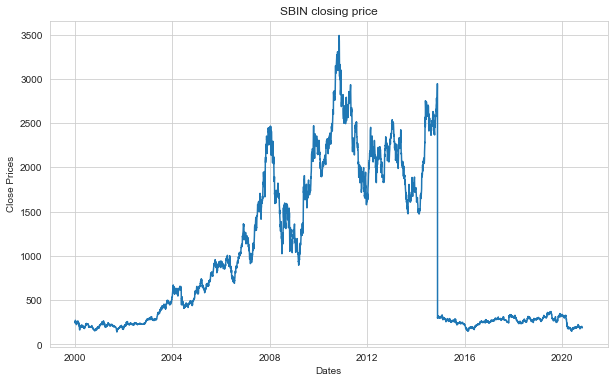

In [82]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Close Prices')
plt.plot(sbin['Close'])
plt.title('SBIN closing price')
plt.show()

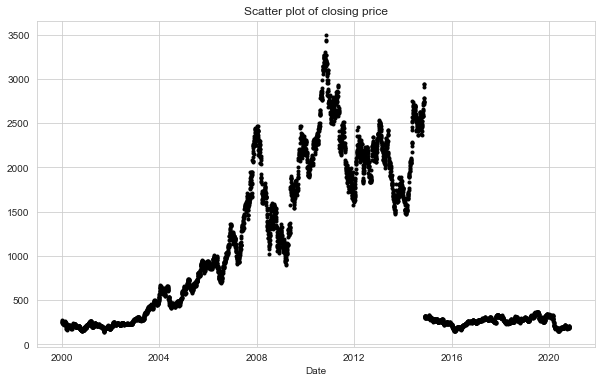

In [83]:
plt.figure(figsize=(10,6))
df_close = sbin['Close']
df_close.plot(style='k.')
plt.title('Scatter plot of closing price')
plt.show()

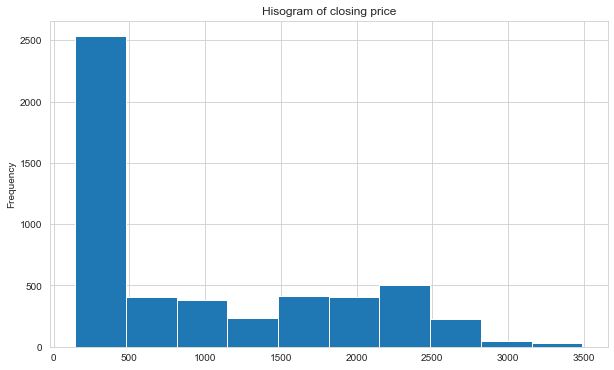

In [84]:
plt.figure(figsize=(10,6))
df_close = sbin['Close']
df_close.plot(style='k.',kind='hist')
plt.title('Hisogram of closing price')
plt.show()

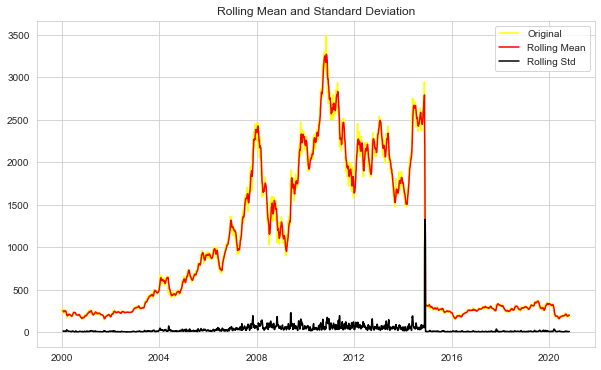

Results of dickey fuller test
Test Statistics                  -1.914523
p-value                           0.325260
No. of lags used                  3.000000
Number of observations used    5183.000000
critical value (1%)              -3.431612
critical value (5%)              -2.862098
critical value (10%)             -2.567067
dtype: float64


In [85]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    #Plot rolling statistics:
    plt.plot(timeseries, color='yellow',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    #hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)

test_stationarity(sbin['Close'])

<Figure size 720x432 with 0 Axes>

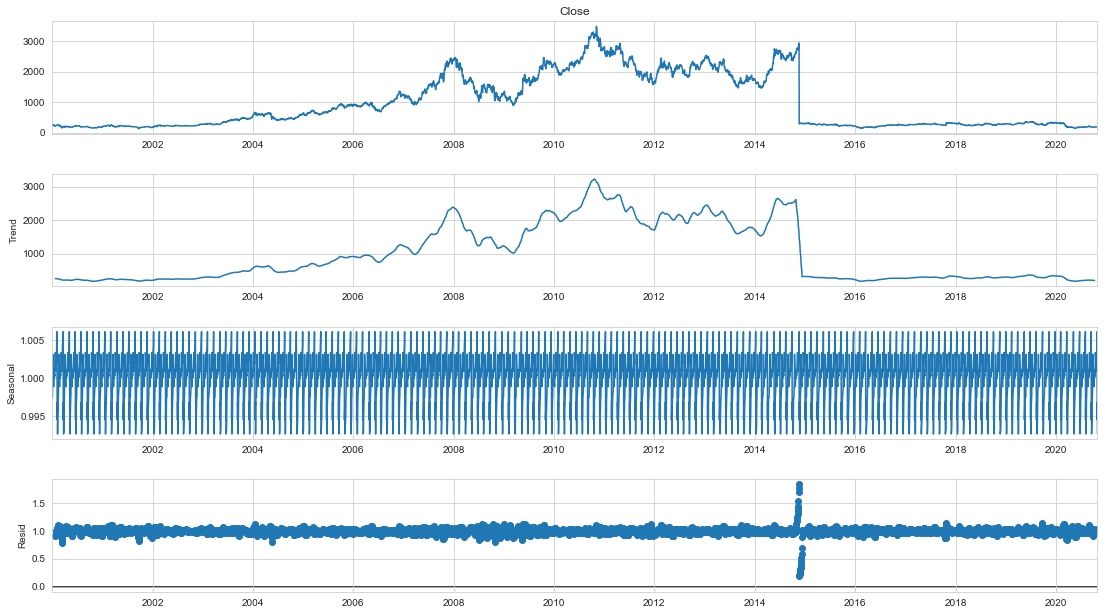

In [86]:
result = seasonal_decompose(df_close, model='multiplicative', freq = 30)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(16, 9)

No handles with labels found to put in legend.


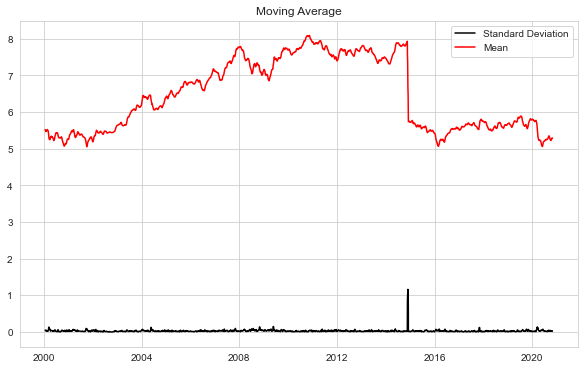

In [87]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
df_log = np.log(sbin['Close'])
moving_avg = df_log.rolling(12).mean()
std_dev = df_log.rolling(12).std()
plt.legend(loc='best')
plt.title('Moving Average')
plt.plot(std_dev, color ="black", label = "Standard Deviation")
plt.plot(moving_avg, color="red", label = "Mean")
plt.legend()
plt.show()

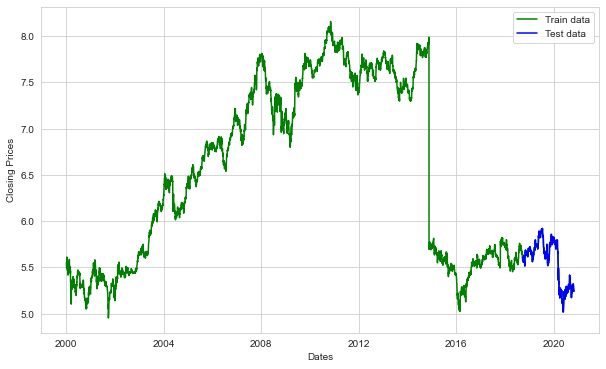

In [88]:
train_data, test_data = df_log[3:int(len(df_log)*0.9)], df_log[int(len(df_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(df_log, 'green', label='Train data')
plt.plot(test_data, 'blue', label='Test data')
plt.legend()

In [89]:
model_autoARIMA = auto_arima(train_data, start_p=0, start_q=0,
test='adf',       # use adftest to find optimal 'd'
max_p=3, max_q=3, # maximum p and q
m=1,              # frequency of series
d=None,           # let model determine 'd'
seasonal=False,   # No Seasonality
start_P=0, 
D=0, 
trace=True,
error_action='ignore',  
suppress_warnings=True, 
stepwise=True)
print(model_autoARIMA.summary())

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-16607.561, Time=1.16 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-16607.961, Time=0.42 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-16608.035, Time=1.48 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-16609.560, Time=0.40 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-16606.477, Time=1.99 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 5.505 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 4665
Model:               SARIMAX(0, 1, 0)   Log Likelihood                8305.780
Date:                Sun, 21 Feb 2021   AIC                         -16609.560
Time:                        21:23:23   BIC                         -16603.113
Sample:                             0   HQIC                        -16607.293
                               - 4665                             

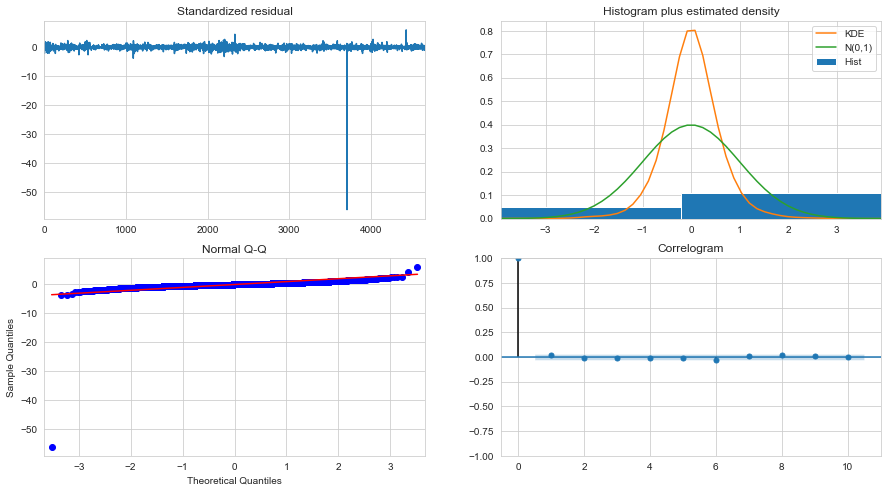

In [90]:
model_autoARIMA.plot_diagnostics(figsize=(15,8))
plt.show()

In [94]:
model = ARIMA(train_data, order=(3, 1, 2))
fitted = model.fit(disp=-1)
print(fitted.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 4664
Model:                 ARIMA(3, 1, 2)   Log Likelihood                8308.610
Method:                       css-mle   S.D. of innovations              0.041
Date:                Sun, 21 Feb 2021   AIC                         -16603.221
Time:                        21:25:54   BIC                         -16558.087
Sample:                             1   HQIC                        -16587.346
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const          9.202e-06      0.001      0.016      0.987      -0.001       0.001
ar.L1.D.Close     0.2793        nan        nan        nan         nan         nan
ar.L2.D.Close     0.3045        nan     

In [97]:
# Forecast

fc, se, conf = fitted.forecast(519, alpha=0.05)  # 95% confidence

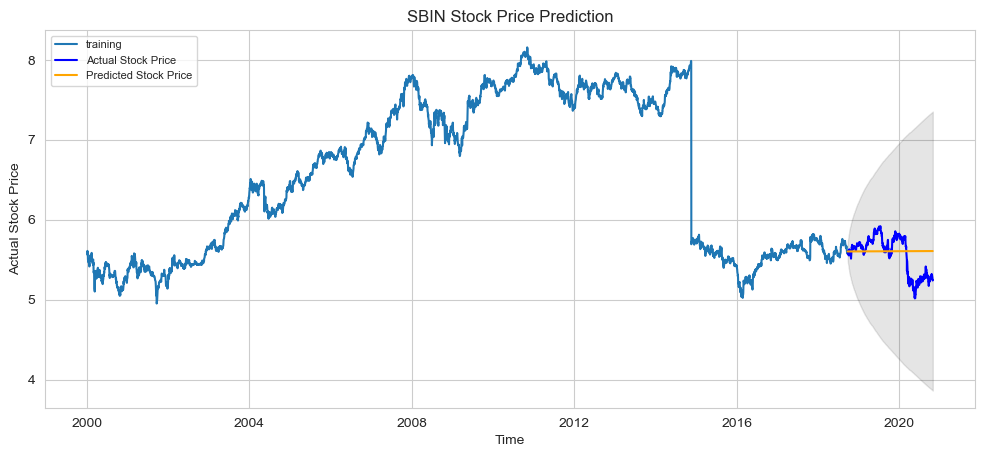

In [98]:
fc_series = pd.Series(fc, index=test_data.index)
lower_series = pd.Series(conf[:, 0], index=test_data.index)
upper_series = pd.Series(conf[:, 1], index=test_data.index)
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, color = 'blue', label='Actual Stock Price')
plt.plot(fc_series, color = 'orange',label='Predicted Stock Price')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.10)
plt.title('SBIN Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Actual Stock Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [3]:
import os
os.getcwd()
#os.chdir('putnewpath')
os.chdir('C:/Users/T430\OneDrive - Washington State University (email.wsu.edu)/PythonReferences')

In [5]:
# The get() method on dicts
# and its "default" argument

name_for_userid = {
    382: "Alice",
    590: "Bob",
    951: "Dilbert",
}


def greeting(userid):
    return "Hi %s!" % name_for_userid.get(userid, "there")

greeting(382)
"Hi Alice!"

greeting(333333)
"Hi there!"

'Hi there!'

In [4]:
#back testing
import numpy as np
price = np.loadtxt('index.csv',delimiter=',',skiprows=1)
y = np.diff(np.log(price), n=1, axis=0) # get returns

In [8]:
price.view()
y

array([ 0.00218138,  0.00153179,  0.00543592, ..., -0.00384422,
        0.00555516, -0.00560639])

In [ ]:
from math import ceil
T = len(y)           # number of obs for y
WE = 1000  # estimation window length
p = 0.01   # probability
l1 = ceil(WE * p)    # HS observation
value = 1  # portfolio value
VaR = np.full([T,4], np.nan) # matrix for forecasts
## EWMA setup
lmbda = 0.94
s11 = np.var(y)
for t in range(1,WE):
    s11=lmbda*s11+(1-lmbda)*y[t-1]**2

In [10]:
import pyspark